In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('Churn_Modelling.csv')

# Data exploration


In [78]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
data.shape

(10000, 14)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [82]:
data.select_dtypes(include = 'object').columns


Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [83]:
data.select_dtypes(exclude = 'object').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Data Preprocessing

In [84]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
data.duplicated().any()

False

In [86]:
data.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [87]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
data.select_dtypes(include = 'object').columns

Index(['Geography', 'Gender'], dtype='object')

In [89]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [90]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [91]:
data1 = data.drop(columns =['Gender'])

In [92]:
data1.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [93]:
data2 = data.drop(columns =['Geography'])

In [94]:
data2.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [95]:
data = pd.get_dummies(data = data, drop_first = True , dtype = 'int64')

In [96]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


[]

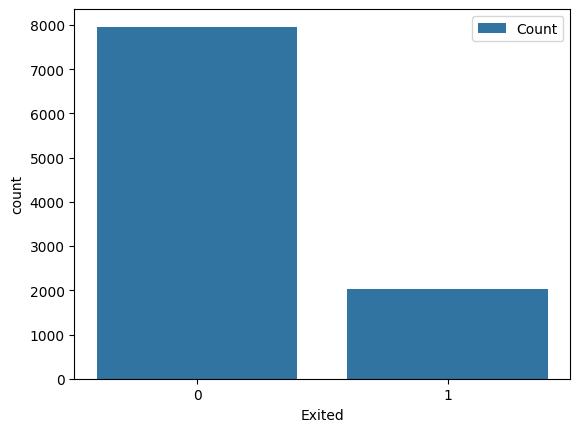

In [97]:
sns.countplot(x = 'Exited' , data = data, label = 'Count')
plt.plot()

In [98]:
(data.Exited == 0).sum()

7963

In [99]:
(data.Exited == 1).sum()

2037

In [100]:
data3 = data.drop(columns = ['Exited'])

<Axes: title={'center': 'Correlation with Exited'}>

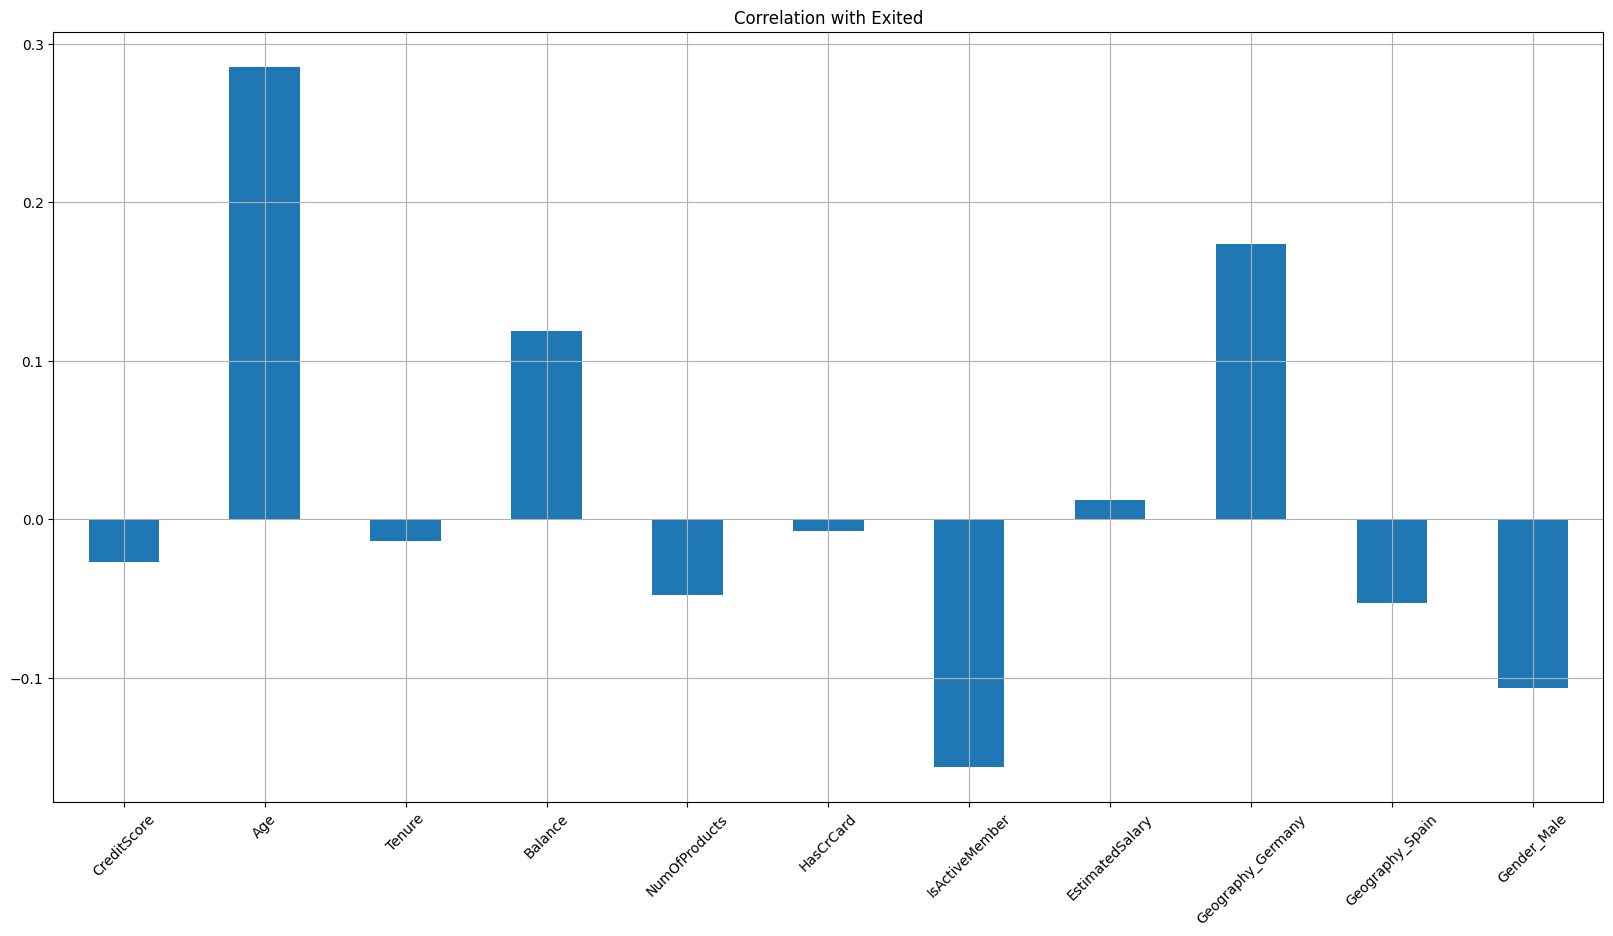

In [101]:
data3.corrwith(data['Exited']).plot.bar(figsize = (20,10), title = 'Correlation with Exited', rot = 45, grid = True)

In [102]:
corr = data.corr()

<Axes: >

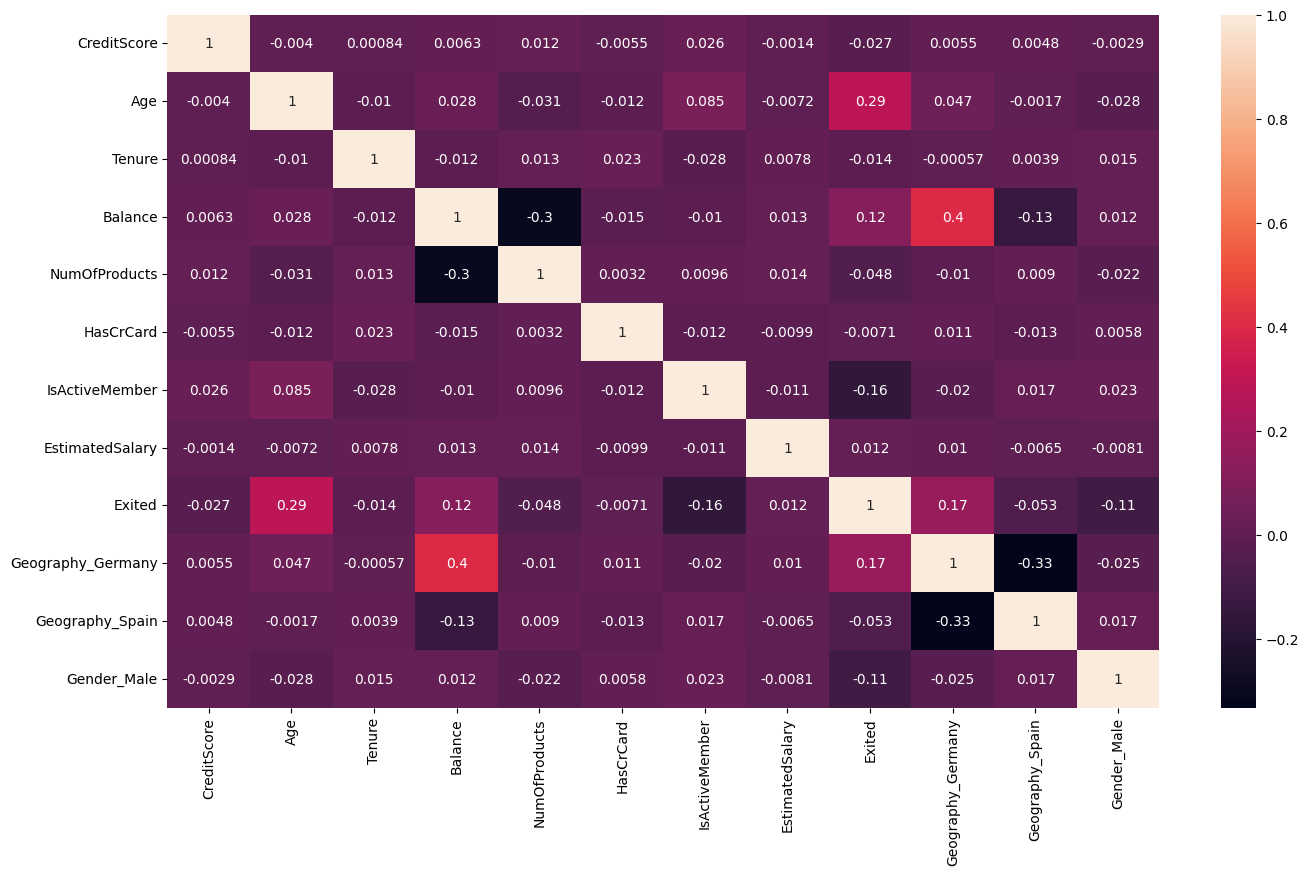

In [103]:
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)


# Splitting the dataset

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = data3
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [106]:
y = data['Exited']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [111]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [112]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Building the Model

### Logistic Regression:

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [114]:
logi = LogisticRegression(random_state = 0)
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)

In [115]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc, f1,recall, precision

(0.811, 0.3368421052631579, 0.23703703703703705, 0.5818181818181818)

In [116]:
result = pd.DataFrame([['LogisticRegression', acc, f1, recall, precision]], columns = ['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
result

,Model,Accuracy,F1 Score,Recall,Precision
0,LogisticRegression,0.811,0.336842,0.237037,0.581818


In [117]:
confusion_matrix(y_test, y_pred)

array([[1526,   69],
       [ 309,   96]], dtype=int64)

In [118]:
cross_val_score(logi, X_train, y_train, cv = 10).mean()

0.8085000000000001

### Random Forest Model

In [119]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [120]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc, f1,recall, precision

(0.867, 0.6133720930232558, 0.5209876543209877, 0.7455830388692579)

In [121]:
result1 = pd.DataFrame([['Random Forest', acc, f1, recall, precision]], columns = ['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
result = pd.concat([result, result1], axis = 0)

In [122]:
result

,Model,Accuracy,F1 Score,Recall,Precision
0,LogisticRegression,0.811,0.336842,0.237037,0.581818
0,Random Forest,0.867,0.613372,0.520988,0.745583


In [123]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


In [124]:
cross_val_score(forest, X_train, y_train, cv = 10).mean()

0.8596250000000001

### XGBoost Model

In [125]:
xg = XGBClassifier(random_state = 42)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [126]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc, f1,recall, precision

(0.8525, 0.594222833562586, 0.5333333333333333, 0.6708074534161491)

In [127]:
result2 = pd.DataFrame([['XGboost', acc, f1, recall, precision]], columns = ['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
result = pd.concat([result, result2], axis = 0)

In [128]:
result

,Model,Accuracy,F1 Score,Recall,Precision
0,LogisticRegression,0.8110,0.336842,0.237037,0.581818
0,Random Forest,0.8670,0.613372,0.520988,0.745583
0,XGboost,0.8525,0.594223,0.533333,0.670807


In [129]:
confusion_matrix(y_test, y_pred)

array([[1489,  106],
       [ 189,  216]], dtype=int64)

In [130]:
cross_val_score(xg, X_train, y_train, cv =10).mean()

0.8512500000000001

# Hyper parameter Tuning


In [131]:
# from sklearn.model_selection import  RandomizedSearchCV
# from scipy.stats import uniform 

In [132]:
# parametes = { 
#     'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
#     'max_features':['sqrt', 'log2', None, 0.2,0.6,1],
#     'max_depth': [2,4,6,8],
#     'bootstrap':[True],
#     'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
#     }

In [133]:
# parametes

In [134]:
# rand= RandomizedSearchCV(estimator= forest, param_distributions= parametes, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3, random_state = 0)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', None, 0.2, 0.6, 1],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None],
    'bootstrap': [True],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

rand = RandomizedSearchCV(estimator=forest, param_distributions=parameters, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3, random_state=0)
rand.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, None],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.2, 0.6, 1],
                                        'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                        1],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='roc_auc', verbose=3)

In [135]:
rand.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       max_samples=0.7, min_samples_leaf=8,
                       min_samples_split=10, n_estimators=600, random_state=0)

In [136]:
rand.best_params_   

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_samples': 0.7,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [137]:
rand.best_score_

0.8638766403195438

# Final Model

In [145]:
xgf = RandomForestClassifier(criterion='entropy', max_features='log2',
                       max_samples=0.7, min_samples_leaf=8,
                       min_samples_split=10, n_estimators=600, random_state=0)
xgf.fit(X_train, y_train)
y_pred = xgf.predict(X_test)

In [146]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc, f1,recall, precision

(0.8675, 0.6003016591251885, 0.49135802469135803, 0.7713178294573644)

In [147]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1536   59]
 [ 206  199]]


In [148]:
result3 = pd.DataFrame([['forest_final', acc, f1, recall, precision]], columns = ['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
result = pd.concat([result, result3], axis = 0)

In [149]:
result

,Model,Accuracy,F1 Score,Recall,Precision
0,LogisticRegression,0.8110,0.336842,0.237037,0.581818
0,Random Forest,0.8670,0.613372,0.520988,0.745583
0,XGboost,0.8525,0.594223,0.533333,0.670807
0,XGboost_final,0.8420,0.579787,0.538272,0.628242
0,XGboost_final,0.8675,0.600302,0.491358,0.771318


In [150]:
cross_val_score(xgf, X_train, y_train, cv =10).mean()

0.8628749999999998